In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout ,Reshape, MaxPooling1D
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crop_yield.csv")

In [3]:
print(df.dtypes)

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [4]:
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'])

In [5]:
X = df.drop('Yield', axis=1)
y = df['Yield']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [9]:
basemodel_reg = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer
])
basemodel_reg.summary()

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,833 (347.00 KB)

 Trainable params: 88,833 (347.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
basemodel_no_reg = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])
basemodel_no_reg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,833 (347.00 KB)

 Trainable params: 88,833 (347.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_reg = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer
])
model_reg.summary()

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 95, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 47, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 47, 64)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 23, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 11, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,601 (428.13 KB)

 Trainable params: 109,601 (428.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_no_reg = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer
])
model_no_reg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 95, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 47, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 47, 64)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 23, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 11, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,601 (428.13 KB)

 Trainable params: 109,601 (428.13 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
basemodel_no_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model without regularization
history_no_reg1 = basemodel_no_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0083 - loss: 406032.7500 - mae: 57.1662 - val_accuracy: 0.0076 - val_loss: 82392.2109 - val_mae: 22.7433
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0083 - loss: 50092.9258 - mae: 17.8799 - val_accuracy: 0.0063 - val_loss: 50200.8789 - val_mae: 18.2442
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0068 - loss: 33323.5078 - mae: 16.5563 - val_accuracy: 0.0079 - val_loss: 27599.4766 - val_mae: 15.2375
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0078 - loss: 35485.2227 - mae: 16.5020 - val_accuracy: 0.0061 - val_loss: 23061.1836 - val_mae: 14.3422
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0071 - loss: 37055.6953 - mae: 14.3798 - val_accuracy: 0.0061 - val_loss: 32400.7109 - val_mae: 13.8047
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0069 - loss: 21509.4238 - mae: 14.0820 - val_accuracy: 0.0086 - val_loss: 200

In [15]:
basemodel_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model with regularization
history_reg1 = basemodel_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0090 - loss: 413474.9375 - mae: 63.8696 - val_accuracy: 0.0086 - val_loss: 112073.0938 - val_mae: 29.4111
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0078 - loss: 108059.7891 - mae: 30.7614 - val_accuracy: 0.0086 - val_loss: 69155.9062 - val_mae: 22.0084
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0075 - loss: 57146.8828 - mae: 23.3513 - val_accuracy: 0.0086 - val_loss: 80333.3984 - val_mae: 24.1938
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0082 - loss: 76659.8125 - mae: 23.6366 - val_accuracy: 0.0086 - val_loss: 177395.2812 - val_mae: 37.6152
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0087 - loss: 67636.6875 - mae: 23.5085 - val_accuracy: 0.0086 - val_loss: 100047.6719 - val_mae: 29.9137
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0085 - loss: 46756.1758 - mae: 19.1558 - val_accuracy: 0.0086 - val_loss:

In [16]:
model_no_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model without regularization
history_no_reg = model_no_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0081 - loss: 595926.5000 - mae: 113.2778 - val_accuracy: 0.0086 - val_loss: 487944.1562 - val_mae: 116.9018
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0080 - loss: 384570.9062 - mae: 76.3504 - val_accuracy: 0.0086 - val_loss: 520136.6250 - val_mae: 84.7824
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0067 - loss: 515650.1875 - mae: 94.0377 - val_accuracy: 0.0086 - val_loss: 341941.1562 - val_mae: 67.0831
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0082 - loss: 277325.5625 - mae: 59.0261 - val_accuracy: 0.0048 - val_loss: 356472.9062 - val_mae: 76.0918
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0073 - loss: 262380.0000 - mae: 57.9454 - val_accuracy: 0.0086 - val_loss: 307528.3438 - val_mae: 64.4521
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0086 - loss: 258960.3125 - mae: 55.3127 - val_accuracy: 0.0086 - v

In [17]:
model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model with regularization
history_reg = model_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0078 - loss: 655207.8125 - mae: 115.0721 - val_accuracy: 0.0038 - val_loss: 470941.5938 - val_mae: 76.2049
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0081 - loss: 519491.6875 - mae: 88.2480 - val_accuracy: 0.0086 - val_loss: 379394.2188 - val_mae: 66.0163
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0088 - loss: 463650.3438 - mae: 81.2784 - val_accuracy: 0.0086 - val_loss: 328150.8438 - val_mae: 65.5468
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0078 - loss: 351555.8438 - mae: 64.8665 - val_accuracy: 0.0086 - val_loss: 400396.0000 - val_mae: 70.4017
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0079 - loss: 350822.7188 - mae: 65.2267 - val_accuracy: 0.0086 - val_loss: 272464.4375 - val_mae: 59.4860
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0082 - loss: 281642.0938 - mae: 56.3435 - val_accuracy: 0.0086 - va

In [18]:
test_loss_reg, test_mae_reg, test_acc_reg = basemodel_no_reg.evaluate(X_test_reshaped, y_test)
print('No Regularization Model : Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)

test_loss_reg, test_mae_reg, test_acc_reg = basemodel_reg.evaluate(X_test_reshaped, y_test)
print('Regularized Model: Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)

test_loss_no_reg, test_mae_no_reg, test_acc_no_reg = model_no_reg.evaluate(X_test_reshaped, y_test)
print('No Regularization Model using CNN: Test MAE:', test_mae_no_reg, 'Test Accuracy:', test_acc_no_reg)

test_loss_reg, test_mae_reg, test_acc_reg = model_reg.evaluate(X_test_reshaped, y_test)
print('Regularized Model Using CNN: Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0077 - loss: 20108.2715 - mae: 10.8893
No Regularization Model : Test MAE: 11.777975082397461 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.0077 - loss: 12454.4863 - mae: 10.1646
Regularized Model: Test MAE: 10.936624526977539 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0077 - loss: 123565.1875 - mae: 18.9444
No Regularization Model using CNN: Test MAE: 16.664316177368164 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0077 - loss: 139509.8125 - mae: 23.2565
Regularized Model Using CNN: Test MAE: 21.15877342224121 Test Accuracy: 0.008633824065327644


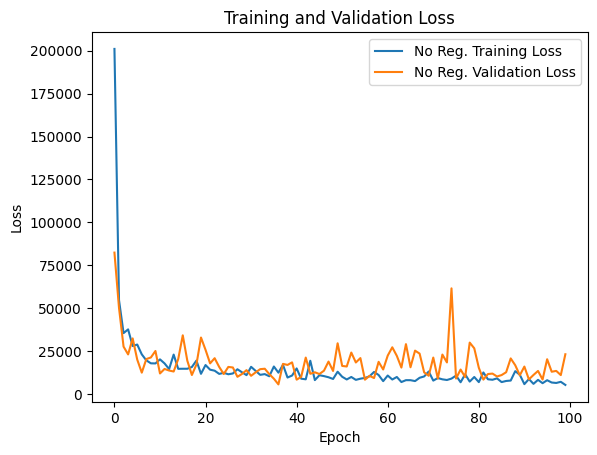

In [19]:
plt.plot(history_no_reg1.history['loss'], label='No Reg. Training Loss')
plt.plot(history_no_reg1.history['val_loss'], label='No Reg. Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

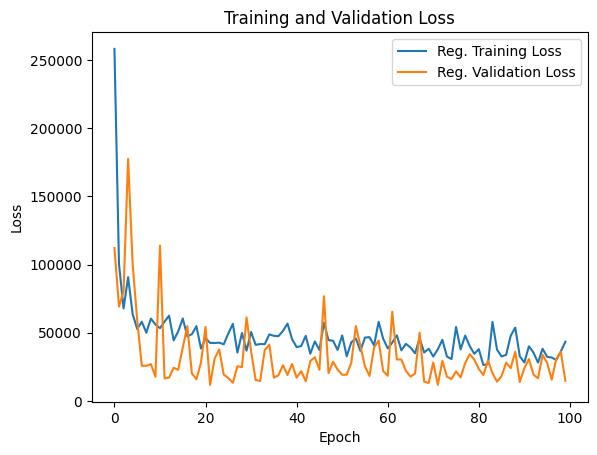

In [20]:
plt.plot(history_reg1.history['loss'], label='Reg. Training Loss')
plt.plot(history_reg1.history['val_loss'], label='Reg. Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

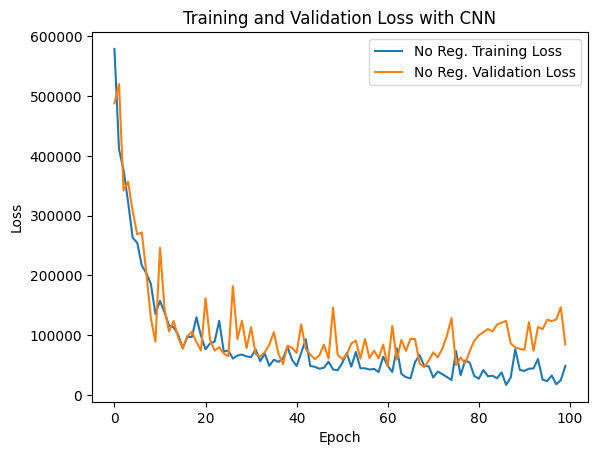

In [21]:
plt.plot(history_no_reg.history['loss'], label='No Reg. Training Loss')
plt.plot(history_no_reg.history['val_loss'], label='No Reg. Validation Loss')
plt.title('Training and Validation Loss with CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

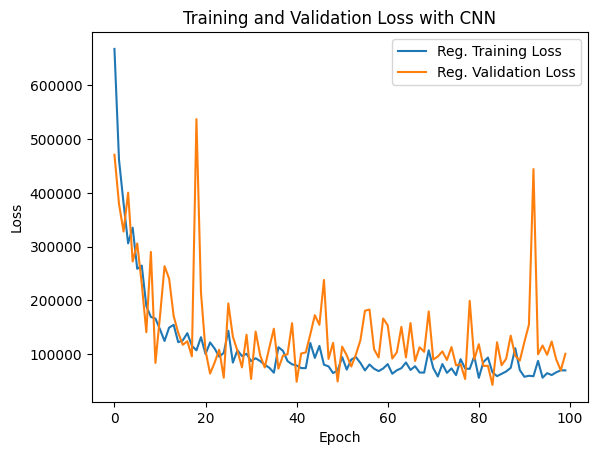

In [22]:
plt.plot(history_reg.history['loss'], label='Reg. Training Loss')
plt.plot(history_reg.history['val_loss'], label='Reg. Validation Loss')
plt.title('Training and Validation Loss with CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()